In [148]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import seaborn as sb
import warnings
import os
import yellowbrick
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from yellowbrick.datasets import load_spam


# --- Libraries Settings ---
pd.set_option("display.precision", 4)
warnings.filterwarnings('ignore')
sb.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')


In [149]:
data = pd.read_csv('cardio_train.csv',delimiter=';')
data = data.drop(columns=['id'])
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [150]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000,70000.0000
mean,19468.8658,1.3496,164.3592,74.2057,128.8173,96.6304,1.3669,1.2265,0.0881,0.0538,0.8037,0.4997
std,2467.2517,0.4768,8.2101,14.3958,154.0114,188.4725,0.6803,0.5723,0.2835,0.2256,0.3972,0.5000
min,10798.0000,1.0000,55.0000,10.0000,-150.0000,-70.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,17664.0000,1.0000,159.0000,65.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
50%,19703.0000,1.0000,165.0000,72.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
75%,21327.0000,2.0000,170.0000,82.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,1.0000
max,23713.0000,2.0000,250.0000,200.0000,16020.0000,11000.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000


In [151]:
duplicate_sum = data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')
    
data.drop_duplicates(keep = 'first', inplace = True)

Duplicates Rows in Dataset are : 24


In [152]:
outlier = ((data["ap_hi"]>200) | (data["ap_lo"]>140) | (data["ap_lo"]<50) | (data["ap_hi"]<80) | (data["height"]<140 ) | (data["height"]>220)|(data["weight"]<35))  
print("There is {} outlier".format(data[outlier]["cardio"].count()))

There is 1500 outlier


In [153]:
data = data[~outlier]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000
mean,19464.1750,1.3489,164.4656,74.1233,126.5681,81.3350,1.3648,1.2259,0.0881,0.0536,0.8035,0.4947
std,2467.8669,0.4766,7.8011,14.2641,16.5346,9.4471,0.6791,0.5719,0.2834,0.2251,0.3973,0.5000
min,10798.0000,1.0000,140.0000,35.0000,80.0000,50.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25%,17658.0000,1.0000,159.0000,65.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
50%,19700.0000,1.0000,165.0000,72.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000
75%,21323.0000,2.0000,170.0000,82.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,1.0000
max,23713.0000,2.0000,207.0000,200.0000,200.0000,140.0000,3.0000,3.0000,1.0000,1.0000,1.0000,1.0000


In [154]:
data[['cardio']] = data[['cardio']].astype(str)
data['year']= (data['age']/365).round(0)
data['height(m)']= (data['height']/100).round(3)
data['BMI']= (data['weight']/((data['height(m)'])*data['height(m)'])).round(2)
data['MAP']= data['ap_lo']+((data['ap_hi']+data['ap_lo'])/3)
data = data.drop(columns=['height','age'])

In [155]:
data.describe()

,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI,MAP
count,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000,68476.0000
mean,1.3489,74.1233,126.5681,81.3350,1.3648,1.2259,0.0881,0.0536,0.8035,53.3261,1.6447,27.4357,150.6360
std,0.4766,14.2641,16.5346,9.4471,0.6791,0.5719,0.2834,0.2251,0.3973,6.7669,0.0780,5.1847,16.9629
min,1.0000,35.0000,80.0000,50.0000,1.0000,1.0000,0.0000,0.0000,0.0000,30.0000,1.4000,12.2500,93.3333
25%,1.0000,65.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,48.0000,1.5900,23.8800,146.6667
50%,1.0000,72.0000,120.0000,80.0000,1.0000,1.0000,0.0000,0.0000,1.0000,54.0000,1.6500,26.3500,146.6667
75%,2.0000,82.0000,140.0000,90.0000,2.0000,1.0000,0.0000,0.0000,1.0000,58.0000,1.7000,30.1200,163.3333
max,2.0000,200.0000,200.0000,140.0000,3.0000,3.0000,1.0000,1.0000,1.0000,65.0000,2.0700,68.3100,253.3333


In [156]:
womendata = data[data['gender'] == 1]
maledata = data[data['gender'] == 2]

In [157]:
womendata = womendata.drop(columns=['gender'])
womendata.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI,MAP
1,85.0,140,90,3,1,0,0,1,1,55.0,1.56,34.93,166.6667
2,64.0,130,70,3,1,0,0,0,1,52.0,1.65,23.51,136.6667
4,56.0,100,60,1,1,0,0,0,0,48.0,1.56,23.01,113.3333
5,67.0,120,80,2,2,0,0,0,0,60.0,1.51,29.38,146.6667
6,93.0,130,80,3,1,0,0,1,0,61.0,1.57,37.73,150.0000


In [158]:
womendata.corr()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI,MAP
weight,1.0000,0.2693,0.2465,0.1490,0.1078,0.0231,0.0477,-0.0158,0.0817,0.1808,0.9114,0.2698
ap_hi,0.2693,1.0000,0.7224,0.2007,0.1008,0.0006,0.0176,-0.0018,0.2324,-0.0457,0.2860,0.8590
ap_lo,0.2465,0.7224,1.0000,0.1648,0.0826,0.0043,0.0204,-0.0004,0.1789,-0.0288,0.2569,0.9746
cholesterol,0.1490,0.2007,0.1648,1.0000,0.4660,0.0233,0.0456,0.0042,0.1640,-0.0815,0.1802,0.1871
gluc,0.1078,0.1008,0.0826,0.4660,1.0000,0.0110,0.0169,-0.0132,0.1026,-0.0273,0.1177,0.0938
smoke,0.0231,0.0006,0.0043,0.0233,0.0110,1.0000,0.1469,-0.0024,-0.0259,0.0086,0.0174,0.0034
alco,0.0477,0.0176,0.0204,0.0456,0.0169,0.1469,1.0000,0.0126,-0.0174,-0.0098,0.0501,0.0208
active,-0.0158,-0.0018,-0.0004,0.0042,-0.0132,-0.0024,0.0126,1.0000,-0.0116,-0.0264,-0.0058,-0.0008
year,0.0817,0.2324,0.1789,0.1640,0.1026,-0.0259,-0.0174,-0.0116,1.0000,-0.0850,0.1175,0.2078
height(m),0.1808,-0.0457,-0.0288,-0.0815,-0.0273,0.0086,-0.0098,-0.0264,-0.0850,1.0000,-0.2324,-0.0361


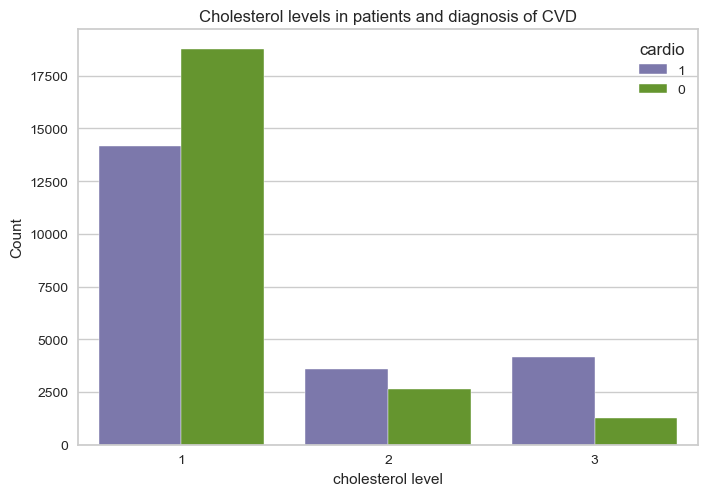

In [159]:
#using a clustered bar chart
sb.countplot(data = womendata,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

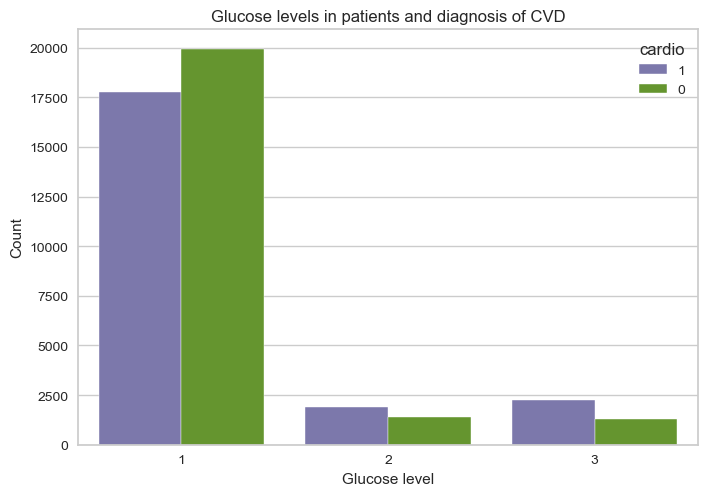

In [160]:
#using a clustered bar chart
sb.countplot(data = womendata,x='gluc',hue='cardio')
plt.title('Glucose levels in patients and diagnosis of CVD')
plt.xlabel('Glucose level')
plt.ylabel('Count');

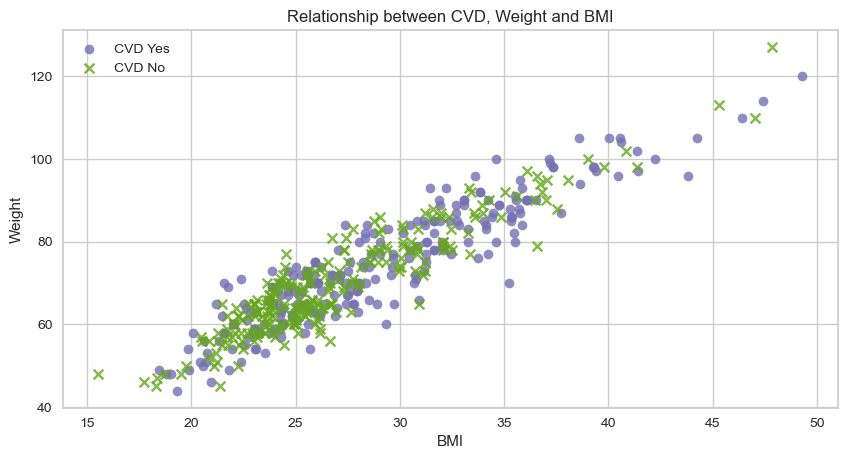

In [161]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(womendata.shape[0],500,replace = False)
cardio_subset = womendata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend(['CVD Yes','CVD No']);


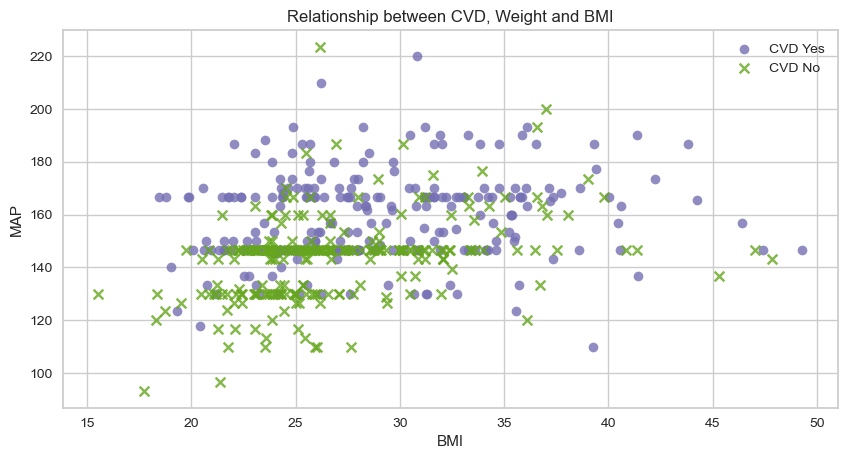

In [162]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(womendata.shape[0],500,replace = False)
cardio_subset = womendata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='MAP',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI')
plt.ylabel('MAP')
plt.legend(['CVD Yes','CVD No']);

In [163]:
#data[['cardio']] = data[['cardio']].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68476 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68476 non-null  int64  
 1   weight       68476 non-null  float64
 2   ap_hi        68476 non-null  int64  
 3   ap_lo        68476 non-null  int64  
 4   cholesterol  68476 non-null  int64  
 5   gluc         68476 non-null  int64  
 6   smoke        68476 non-null  int64  
 7   alco         68476 non-null  int64  
 8   active       68476 non-null  int64  
 9   cardio       68476 non-null  object 
 10  year         68476 non-null  float64
 11  height(m)    68476 non-null  float64
 12  BMI          68476 non-null  float64
 13  MAP          68476 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 7.8+ MB


In [164]:
maledata = maledata.drop(columns=['gender'])
maledata.head()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year,height(m),BMI,MAP
0,62.0,110,80,1,1,0,0,1,0,50.0,1.68,21.97,143.3333
3,82.0,150,100,1,1,0,0,1,1,48.0,1.69,28.71,183.3333
7,95.0,130,90,3,3,0,0,1,1,62.0,1.78,29.98,163.3333
11,60.0,120,80,1,1,0,0,1,0,52.0,1.73,20.05,146.6667
12,60.0,120,80,1,1,0,0,0,0,41.0,1.65,22.04,146.6667


In [165]:
maledata.corr()

,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,year,height(m),BMI,MAP
weight,1.0000,0.2515,0.2399,0.1475,0.1199,0.0140,0.0421,-0.0241,0.0193,0.4398,0.8991,0.2615
ap_hi,0.2515,1.0000,0.6849,0.1889,0.0819,0.0131,0.0326,-0.0033,0.1737,0.0326,0.2642,0.8389
ap_lo,0.2399,0.6849,1.0000,0.1606,0.0664,0.0019,0.0409,-0.0005,0.1170,0.0505,0.2425,0.9712
cholesterol,0.1475,0.1889,0.1606,1.0000,0.4183,0.0316,0.0452,0.0194,0.1372,0.0302,0.1473,0.1817
gluc,0.1199,0.0819,0.0664,0.4183,1.0000,-0.0036,0.0135,0.0038,0.0916,0.0189,0.1231,0.0764
smoke,0.0140,0.0131,0.0019,0.0316,-0.0036,1.0000,0.3599,0.0472,-0.0618,0.0392,-0.0029,0.0057
alco,0.0421,0.0326,0.0409,0.0452,0.0135,0.3599,1.0000,0.0380,-0.0347,0.0316,0.0320,0.0412
active,-0.0241,-0.0033,-0.0005,0.0194,0.0038,0.0472,0.0380,1.0000,-0.0083,0.0045,-0.0296,-0.0014
year,0.0193,0.1737,0.1170,0.1372,0.0916,-0.0618,-0.0347,-0.0083,1.0000,-0.0929,0.0681,0.1442
height(m),0.4398,0.0326,0.0505,0.0302,0.0189,0.0392,0.0316,0.0045,-0.0929,1.0000,0.0099,0.0484


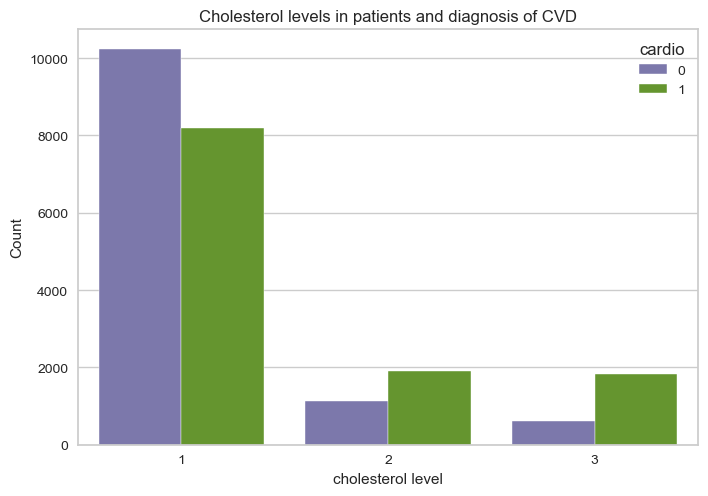

In [166]:
#using a clustered bar chart
sb.countplot(data = maledata,x='cholesterol',hue='cardio')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

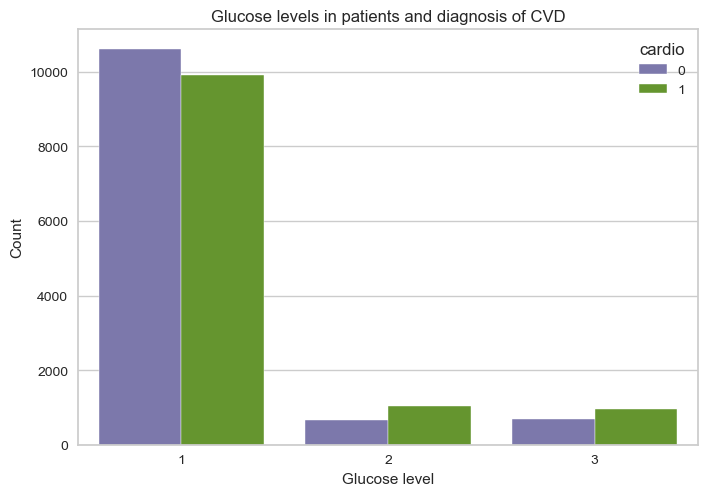

In [167]:
#using a clustered bar chart
sb.countplot(data = maledata,x='gluc',hue='cardio')
plt.title('Glucose levels in patients and diagnosis of CVD')
plt.xlabel('Glucose level')
plt.ylabel('Count');

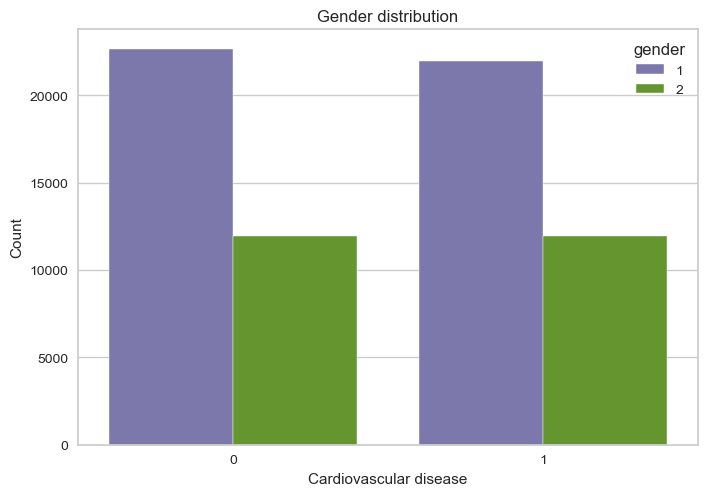

In [168]:
#using seaborns countplot 
sb.countplot(data = data,x='cardio',hue='gender')
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Count');

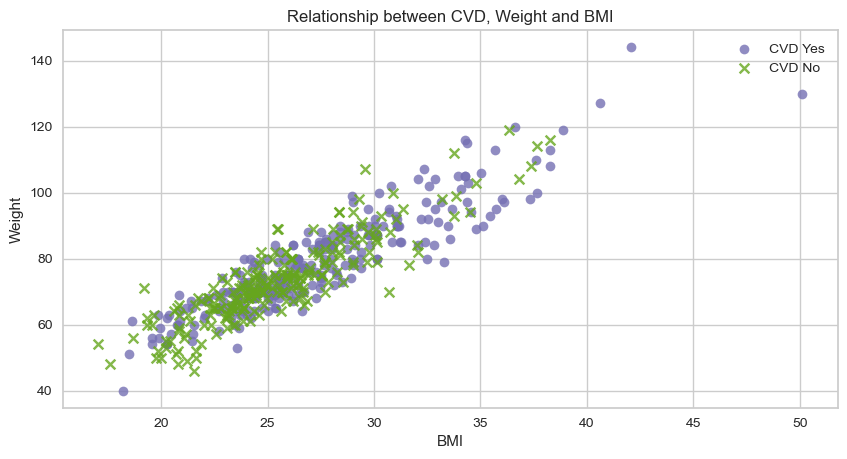

In [169]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(maledata.shape[0],500,replace = False)
cardio_subset = maledata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI')
plt.ylabel('Weight')
plt.legend(['CVD Yes','CVD No']);


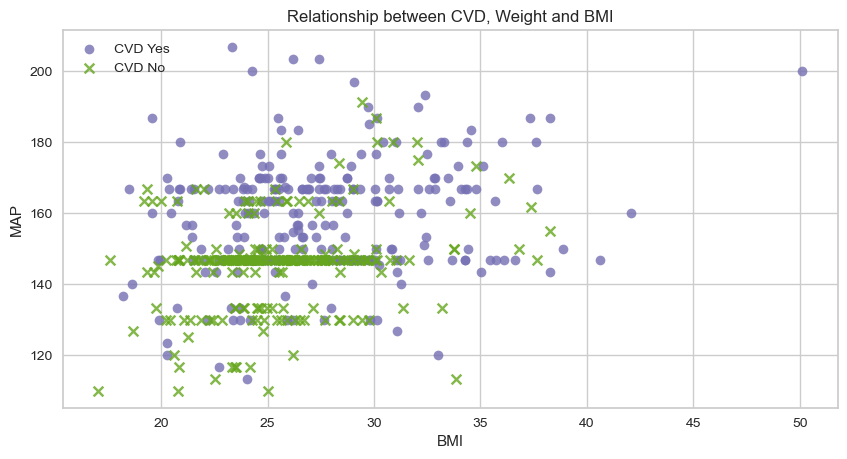

In [170]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)

#creating a sample dataset to reduce overplotting
sample = np.random.choice(maledata.shape[0],500,replace = False)
cardio_subset = maledata.iloc[sample]

#setting my figure size
plt.figure(figsize=[10,5])
#Creating markers for the categories
cvd_markers =[['1','o'],['0','x']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cardio']== cvd]
    sb.regplot(data=plot_data,x='BMI',y='MAP',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI')
plt.ylabel('MAP')
plt.legend(['CVD Yes','CVD No']);


In [171]:
womendata = womendata.drop(columns=['smoke', 'alco', 'active','ap_hi','ap_lo'])
womendata.describe()

,weight,cholesterol,gluc,year,height(m),BMI,MAP
count,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000,44587.0000
mean,72.4827,1.3829,1.2347,53.4424,1.6147,27.8582,149.7733
std,14.0806,0.6924,0.5827,6.6665,0.0661,5.5332,17.0947
min,35.0000,1.0000,1.0000,30.0000,1.4000,12.2500,93.3333
25%,63.0000,1.0000,1.0000,49.0000,1.5700,23.8800,143.3333
50%,70.0000,1.0000,1.0000,54.0000,1.6200,26.6700,146.6667
75%,80.0000,2.0000,1.0000,58.0000,1.6600,30.8600,163.3333
max,200.0000,3.0000,3.0000,65.0000,1.9800,68.3100,253.3333


In [172]:
womendata.corr()

,weight,cholesterol,gluc,year,height(m),BMI,MAP
weight,1.0000,0.1490,0.1078,0.0817,0.1808,0.9114,0.2698
cholesterol,0.1490,1.0000,0.4660,0.1640,-0.0815,0.1802,0.1871
gluc,0.1078,0.4660,1.0000,0.1026,-0.0273,0.1177,0.0938
year,0.0817,0.1640,0.1026,1.0000,-0.0850,0.1175,0.2078
height(m),0.1808,-0.0815,-0.0273,-0.0850,1.0000,-0.2324,-0.0361
BMI,0.9114,0.1802,0.1177,0.1175,-0.2324,1.0000,0.2829
MAP,0.2698,0.1871,0.0938,0.2078,-0.0361,0.2829,1.0000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7202751196172249

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7149905804252266



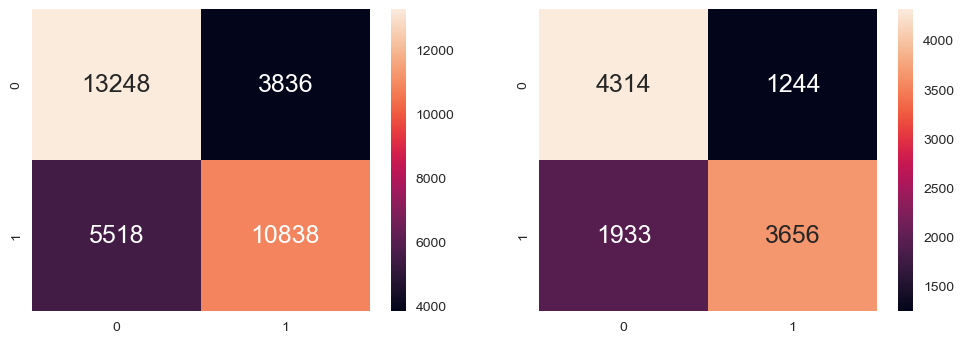

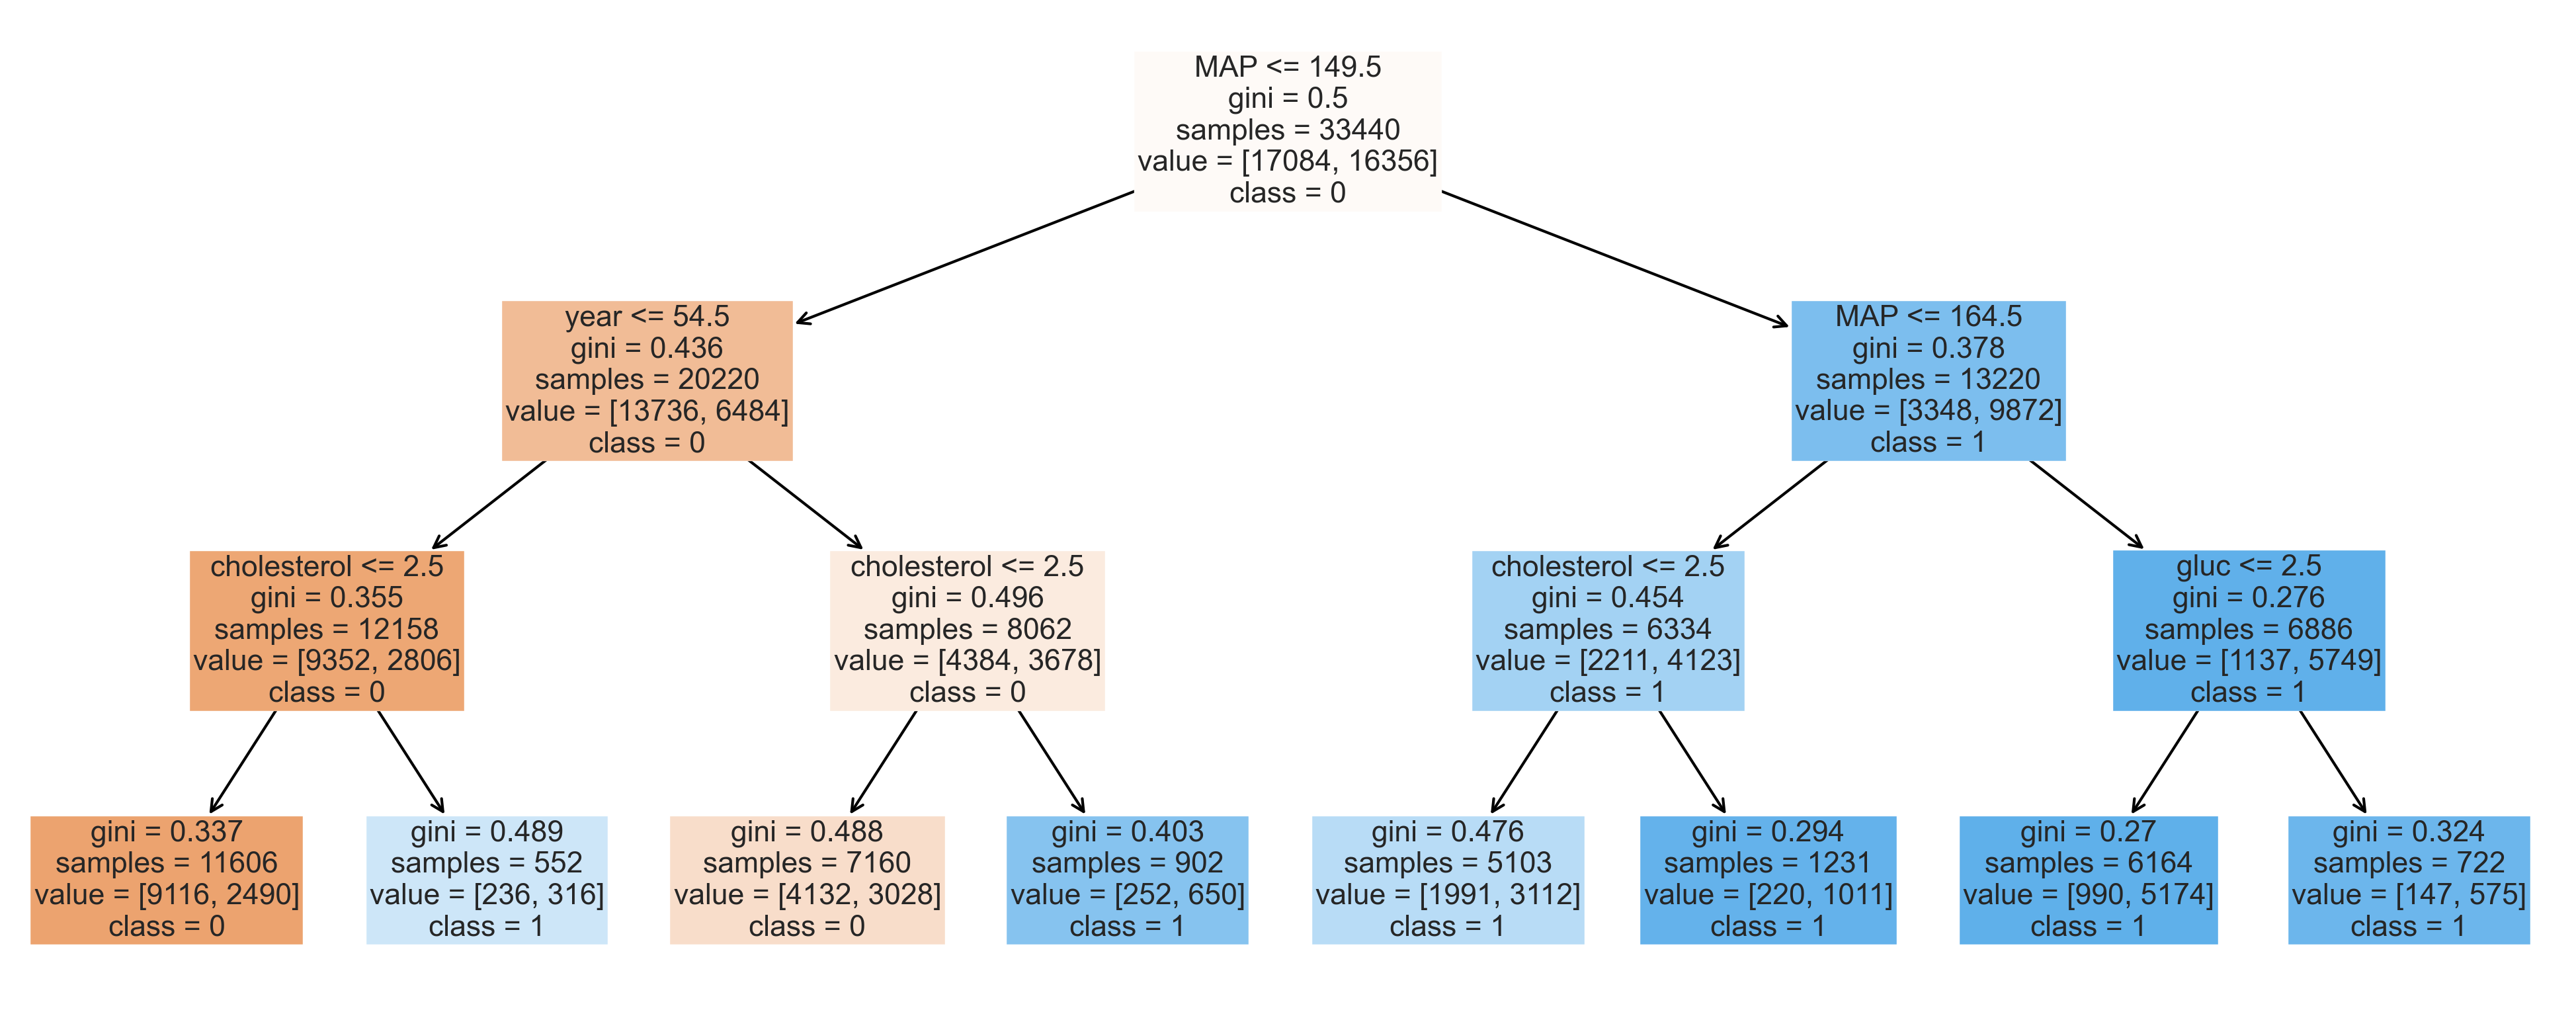

In [195]:
# Import essential models and functions from sklearn(Female data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(womendata['cardio']).astype('int64')
X = pd.DataFrame(womendata[['year', 'cholesterol', 'gluc','BMI','MAP','weight']]).astype('int64')

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
DTCAcc = dectree.score(X_test, y_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 20))
out = plot_tree(dectree, 
                fontsize =32,
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [196]:
X_train

,year,cholesterol,gluc,BMI,MAP,weight
40356,40,1,1,25,143,68
24279,51,1,1,24,146,72
42079,60,1,1,24,146,69
7257,55,1,1,36,133,89
17511,62,1,1,24,126,70
...,...,...,...,...,...,...
63202,62,1,1,37,143,89
39322,64,1,1,38,166,91
59566,58,1,1,24,146,75
45007,44,1,2,24,163,69


In [197]:
y_test.astype('int64')

,cardio
65834,0
40825,1
4350,1
40164,1
10947,0
...,...
5479,0
42361,0
9458,0
32338,0


In [198]:
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
y_train_tmp = y_train.astype('int64')
y_test_tmp = y_test.astype('int64') 

classifier_lr.fit(X_train, y_train_tmp)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test_tmp)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

.:. Logistic Regression Accuracy: 71.08% .:.


visualizer = ROCAUC(classifier_lr, classes=[0, 1])
visualizer.fit(X_train, y_train_tmp)        # Fit the training data to the visualizer

visualizer.score(X_test, y_test_tmp)        # Evaluate the model on the test data
visualizer.show() 

In [202]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train_std, y_train)

y_pred_KNN = KNNClassifier.predict(X_test_std)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train_std, y_train)

y_pred_SVM = SVMclassifier.predict(X_test_std)
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train_std, y_train)

y_pred_GNB = GNBclassifier.predict(X_test_std)
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')


# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train_std, y_train)
y_pred_RF = RFclassifier.predict(X_test)


ETclassifier = ExtraTreesClassifier# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(X_train_std, y_train)
y_pred_ET = ETclassifier.predict(X_test_std)
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')


# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train_std, y_train)
y_pred_GB = GBclassifier.predict(X_test_std)
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [acc_lr*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

.:. Logistic Regression Accuracy: 71.08% .:.
.:. K-Nearest Neighbour Accuracy: 66.24% .:.
.:. Support Vector Machine Accuracy: 64.71% .:.
.:. Gaussian Naive Bayes Accuracy: 67.29% .:.
.:. Random Forest Accuracy: 72.01% .:.
.:. Extra Tree Classifier Accuracy: 66.91% .:.
.:. Gradient Boosting Accuracy: 72.07% .:.
.:. AdaBoost Accuracy: 71.11% .:.


Model,Accuracy
Gradient Boosting,72.073204
Random Forest,72.010406
Decision Tree,71.499058
AdaBoost,71.113304
Logistic Regression,71.077420
Gaussian Naive Bayes,67.291648
Extra Tree Classifier,66.914865
K-Nearest Neighbour,66.242038
Support Vector Machine,64.707993


# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train_std, y_train)
y_pred_GB = GBclassifier.predict(X_test_std)
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

In [220]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

.:. Gradient Boosting Accuracy: 72.07% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      5558
           1       0.74      0.68      0.71      5589

    accuracy                           0.72     11147
   macro avg       0.72      0.72      0.72     11147
weighted avg       0.72      0.72      0.72     11147




.: Performance Evaluation
**************************


TypeError: Singleton array array(<built-in method transpose of numpy.ndarray object at 0x0000027ED7F25450>,
      dtype=object) cannot be considered a valid collection.

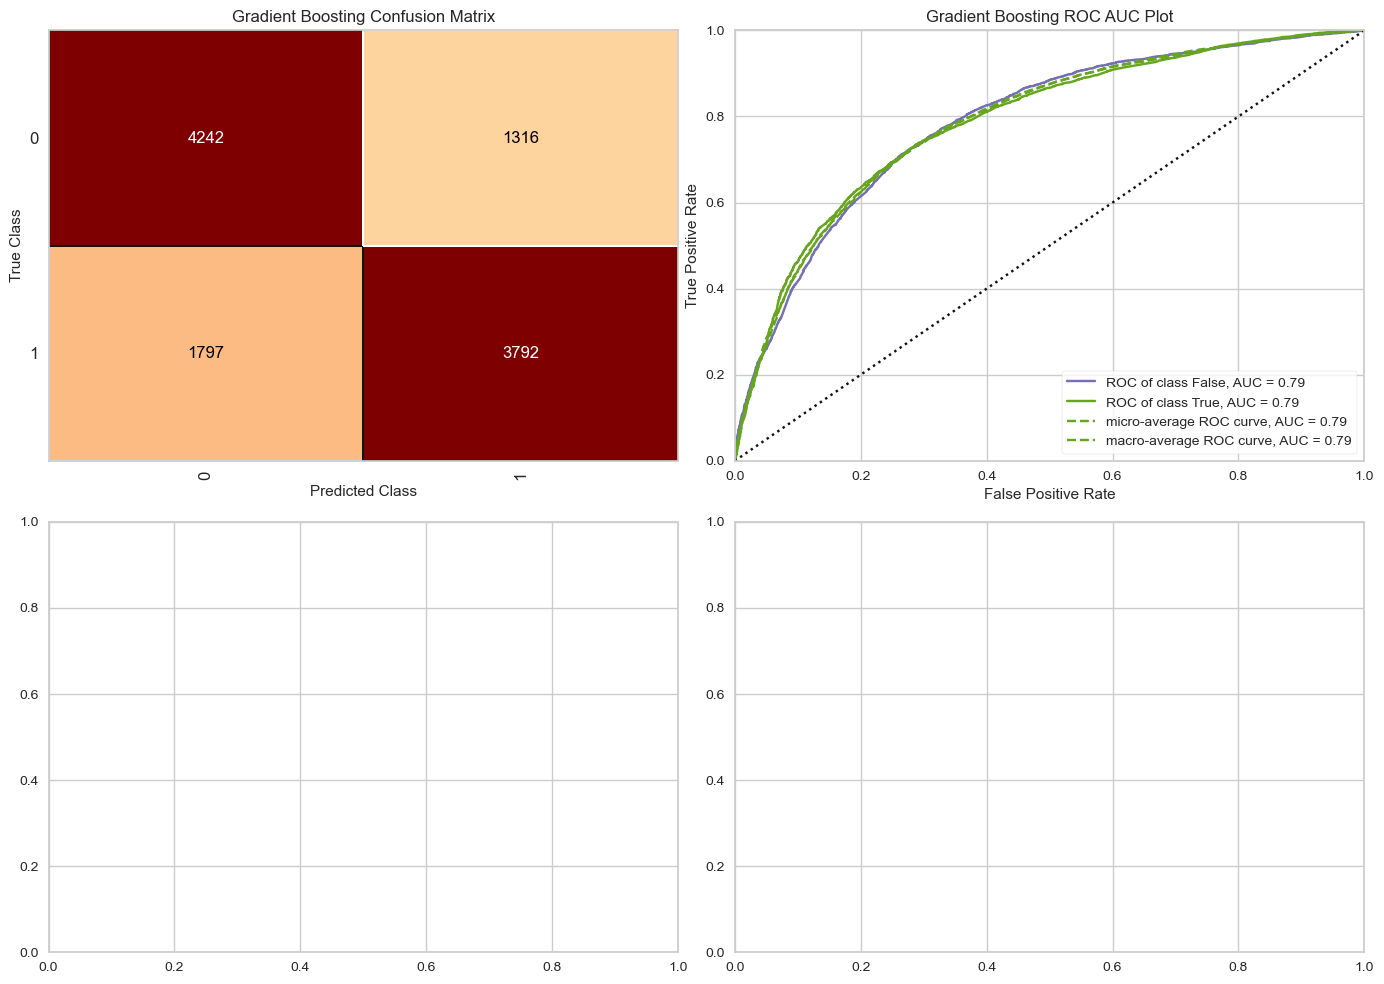

In [224]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='OrRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(X_train_std, y_train)
gbcmatrix.score(X_test_std, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(X_train_std, y_train)
gbcrocauc.score(X_test_std, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(X_train_std, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(X_train, y_train)
gbcurve.score(X_test, y_test)
gbcurve.finalize()

plt.tight_layout();

In [182]:
maledata = maledata.drop(columns=['smoke', 'alco', 'active','ap_hi','ap_lo'])
maledata.describe()

,weight,cholesterol,gluc,year,height(m),BMI,MAP
count,23889.0000,23889.0000,23889.0000,23889.0000,23889.0000,23889.0000,23889.0000
mean,77.1854,1.3309,1.2094,53.1089,1.7005,26.6471,152.2462
std,14.0988,0.6521,0.5507,6.9454,0.0670,4.3538,16.5948
min,40.0000,1.0000,1.0000,30.0000,1.4000,13.5200,93.3333
25%,68.0000,1.0000,1.0000,48.0000,1.6600,23.7400,146.6667
50%,75.0000,1.0000,1.0000,54.0000,1.7000,25.8800,146.6667
75%,85.0000,1.0000,1.0000,58.0000,1.7500,29.0100,163.3333
max,200.0000,3.0000,3.0000,65.0000,2.0700,65.3800,253.3333


In [183]:
maledata.corr()


,weight,cholesterol,gluc,year,height(m),BMI,MAP
weight,1.0000,0.1475,0.1199,0.0193,0.4398,0.8991,0.2615
cholesterol,0.1475,1.0000,0.4183,0.1372,0.0302,0.1473,0.1817
gluc,0.1199,0.4183,1.0000,0.0916,0.0189,0.1231,0.0764
year,0.0193,0.1372,0.0916,1.0000,-0.0929,0.0681,0.1442
height(m),0.4398,0.0302,0.0189,-0.0929,1.0000,0.0099,0.0484
BMI,0.8991,0.1473,0.1231,0.0681,0.0099,1.0000,0.2676
MAP,0.2615,0.1817,0.0764,0.1442,0.0484,0.2676,1.0000


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7113194909578031

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7138791227189017



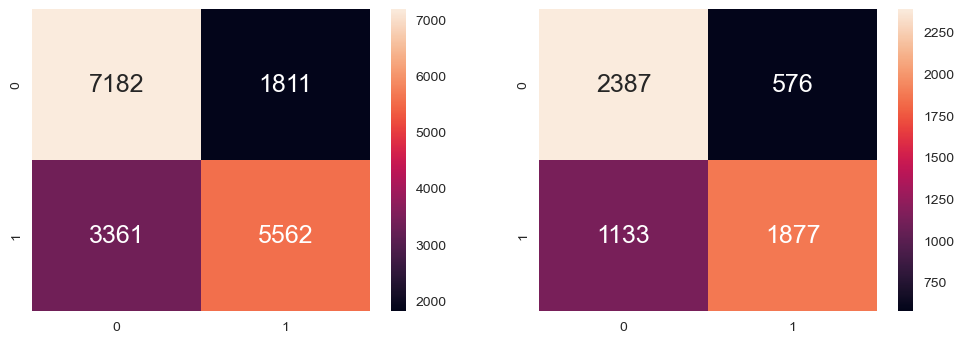

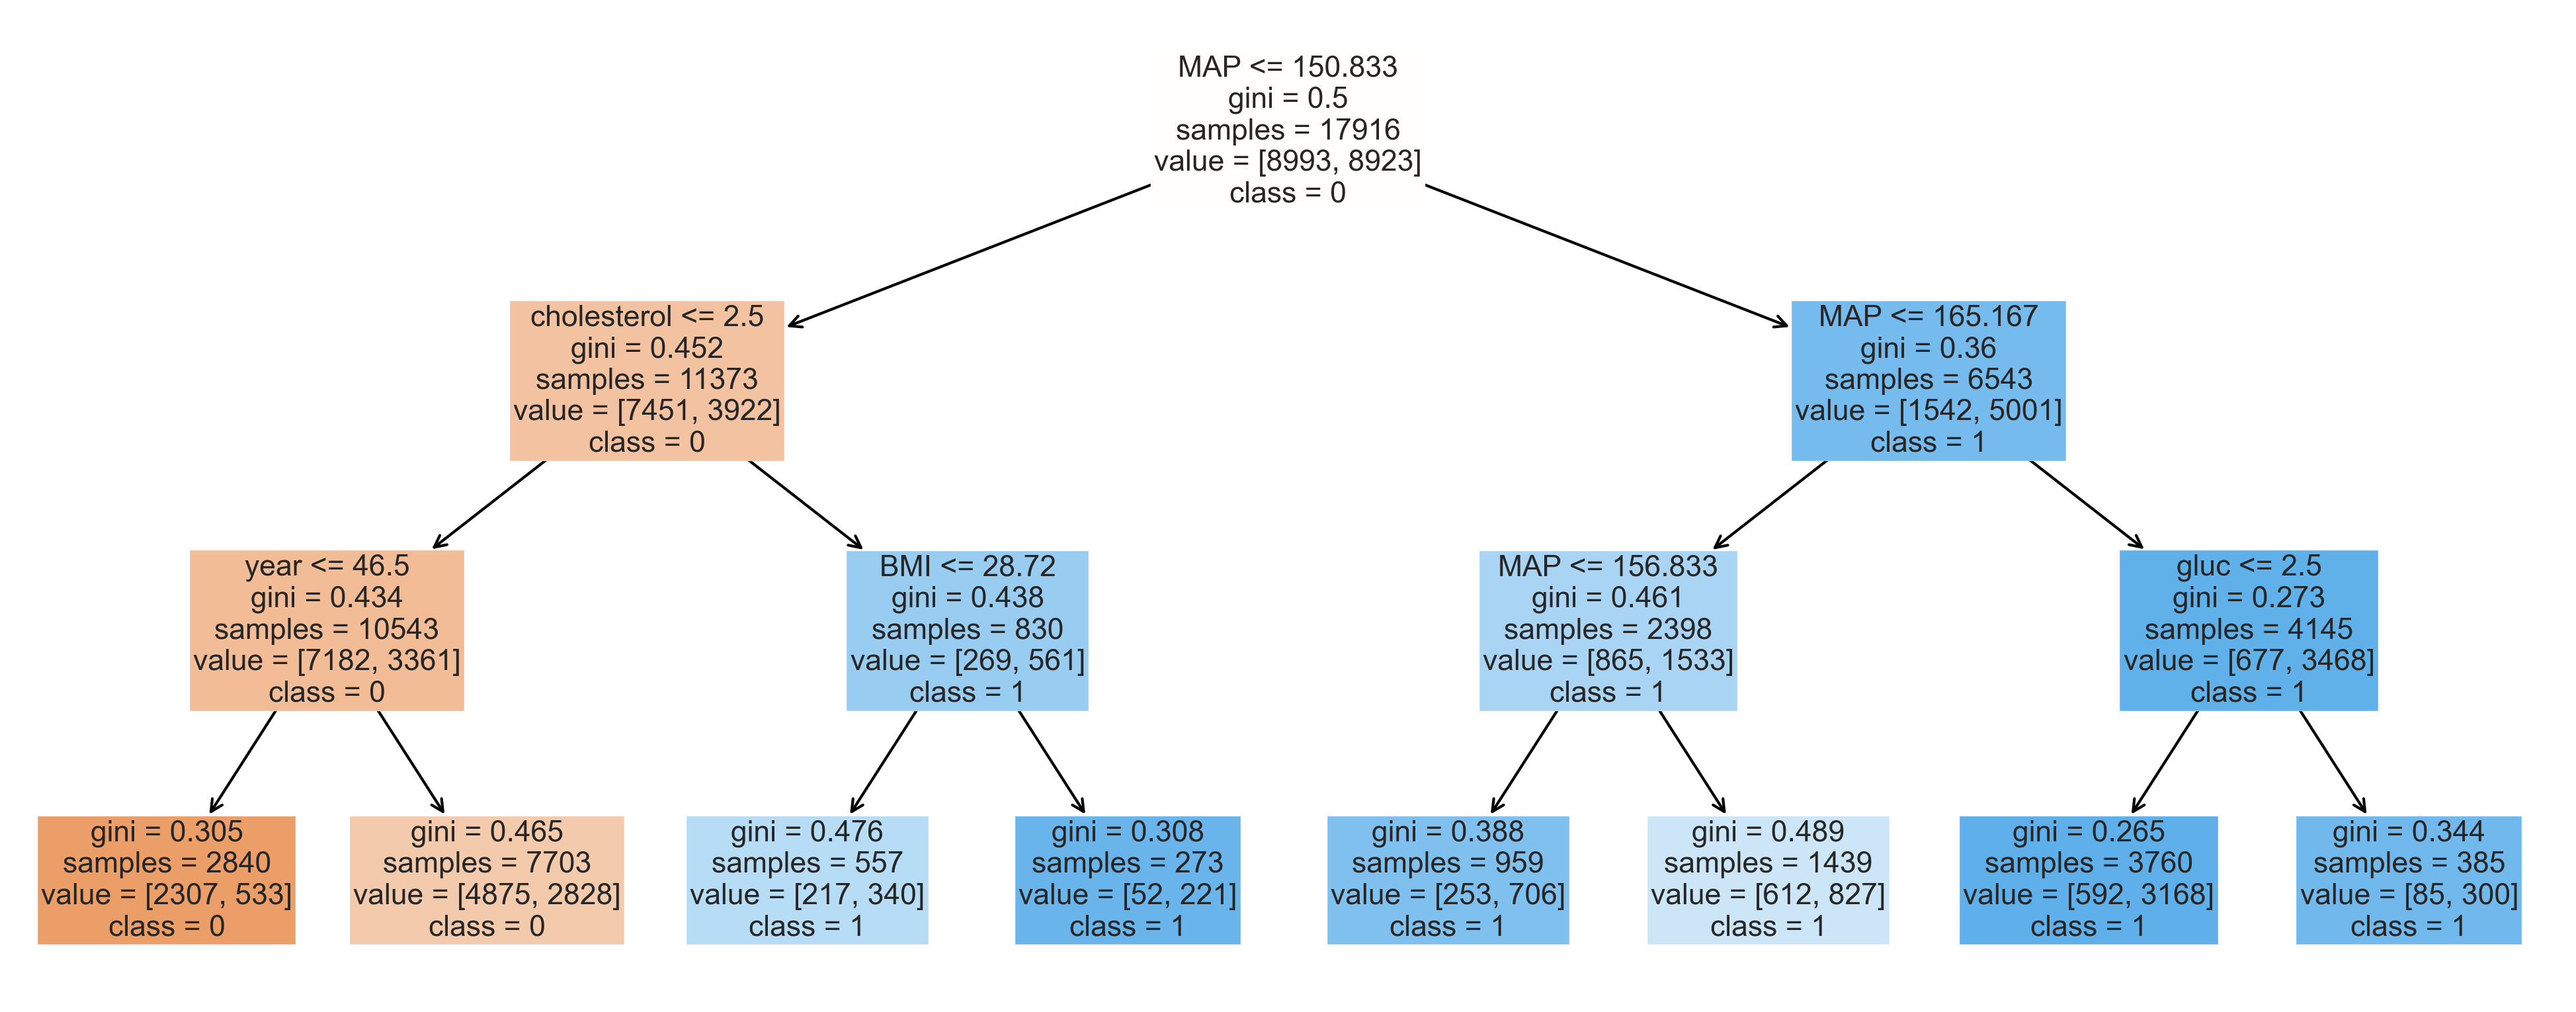

In [184]:
# Import essential models and functions from sklearn(male data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(maledata['cardio'])
X = pd.DataFrame(maledata[['year', 'cholesterol', 'gluc','BMI','MAP','weight']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
DTCAcc = dectree.score(X_test, y_test)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(50, 20))
out = plot_tree(dectree, 
                fontsize =32,
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

In [185]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
# --- Applying Logistic Regression ---
classifier_lr = LogisticRegression(random_state = 42)
classifier_lr.fit(X_train, y_train)
# --- Predicting the test values ---
y_pred_lr = classifier_lr.predict(X_test)
# # --- Scoring ---
# acc_lr = accuracy_score(y_test, y_pred_lr)
# f1_lr = f1_score(y_test, y_pred_lr)
# --- LR Accuracy ---
acc_lr = accuracy_score(y_pred_lr, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(acc_lr*100)+' .:.')

# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(X_train, y_train)

y_pred_KNN = KNNClassifier.predict(X_test)
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(X_train, y_train)

y_pred_SVM = SVMclassifier.predict(X_test)
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(X_train, y_train)

y_pred_GNB = GNBclassifier.predict(X_test)
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')


# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)


ETclassifier = ExtraTreesClassifier# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(X_train, y_train)
y_pred_RF = RFclassifier.predict(X_test)
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Applying ET ---
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)

ETclassifier.fit(X_train, y_train)
y_pred_ET = ETclassifier.predict(X_test)
# --- ET Accuracy ---
ETAcc = accuracy_score(y_pred_ET, y_test)
print('.:. Extra Tree Classifier Accuracy:'+'\033[1m {:.2f}%'.format(ETAcc*100)+' .:.')

# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(X_train, y_train)
y_pred_GB = GBclassifier.predict(X_test)
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
                                  'AdaBoost','Extra Tree Classifier'], 
                        'Accuracy': [acc_lr*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100, 
                                     ABAcc*100, ETAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

.:. Logistic Regression Accuracy: 70.70% .:.
.:. K-Nearest Neighbour Accuracy: 65.21% .:.
.:. Support Vector Machine Accuracy: 59.64% .:.
.:. Gaussian Naive Bayes Accuracy: 66.48% .:.
.:. Random Forest Accuracy: 71.49% .:.
.:. Extra Tree Classifier Accuracy: 66.63% .:.
.:. Gradient Boosting Accuracy: 71.77% .:.
.:. AdaBoost Accuracy: 71.10% .:.


Model,Accuracy
Gradient Boosting,71.772978
Random Forest,71.488364
Decision Tree,71.387912
AdaBoost,71.103298
Logistic Regression,70.701490
Extra Tree Classifier,66.633183
Gaussian Naive Bayes,66.482505
K-Nearest Neighbour,65.210112
Support Vector Machine,59.635024


In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

In [ ]:
# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='Purples',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(X_train, y_train)
rccrocauc.score(X_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True, 
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(X_train, y_train)
rcccurve.score(X_test, y_test)
rcccurve.finalize()

plt.tight_layout();